In [1]:
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from model_generation import pos_3
from kinetic_diagram_analyzer import generate_edges as GE
from kinetic_diagram_analyzer import add_node_attribute

In [2]:
k12 = 1
k21 = 2
k23 = 3
k32 = 5
k13 = 7
k31 = 11

kvals = np.array([[0, k12, k13],
                  [k21, 0, k23],
                  [k31, k32, 0]])

knames = np.array([[0, "k12", "k13"],
                   ["k21", 0, "k23"],
                   ["k31", "k32", 0]])

In [3]:
H = nx.MultiDiGraph()
GE(H, knames, kvals, name_key='name', val_key='val')
pos = pos_3()

In [4]:
# edge_list = list(H.edges(data=True))
# for e in edge_list:
#     print("{} = {}".format(e[2]['name'], e[2]['val']))

In [5]:
probs = np.array([1, 5, 10])
norm = probs.sum(axis=0)
probs = probs/norm
add_node_attribute(H, probs, 'probability')
list(H.nodes(data=True))

[(0, {'probability': 0.0625}),
 (1, {'probability': 0.3125}),
 (2, {'probability': 0.625})]

In [6]:
edge_list = list(H.edges(data=True))
values = [e[2]['val'] for e in edge_list]

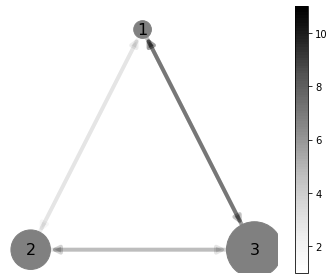

In [7]:
# pos = nx.circular_layout(H)
# pos = nx.random_layout(H)
# pos = nx.shell_layout(H)
# pos = nx.spring_layout(H)
# pos = nx.spectral_layout(H)
fig1 = plt.figure(figsize=(5, 4), tight_layout=True)
fig1.add_subplot(111)

node_sizes = 5e3*probs
node_list = [i for i in range(H.number_of_nodes())]
nodes = nx.draw_networkx_nodes(H, pos, node_size=node_sizes, nodelist=node_list, node_color='grey')

M = H.number_of_edges()
# edge_colors = range(M)
norm = np.array(values).sum(axis=0)
edge_alphas = np.array(values)/norm
# edges = nx.draw_networkx_edges(H, pos, node_size=node_sizes, width=4, arrow_style='->', arrowsize=15, edge_color=edge_colors, edge_cmap=plt.cm.get_cmap('Greys', 100))
edges = nx.draw_networkx_edges(H, pos, node_size=node_sizes, width=4, arrow_style='->', arrowsize=15, edge_cmap=plt.cm.get_cmap('Greys', 100))

labels = {}
for i in range(H.number_of_nodes()):
    labels[i] = r"${}$".format(i+1)
nx.draw_networkx_labels(H, pos, labels, font_size=16)

for i in range(M):
    edges[i].set_alpha(edge_alphas[i])
    
pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap('Greys', 100))
pc.set_array(edge_alphas*norm)
plt.colorbar(pc)
plt.axis('off')
plt.show()

In [8]:
key = 'name'

In [9]:
isinstance(key, str)

True